In [79]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
%matplotlib inline

# Part-1: Data Exploration and Pre-processing

In [80]:
#  Load the given dataset.
df = pd.read_csv(r'C:\Users\Admin\Downloads\Python_Project_7_Nai.csv')
df

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default Status
0,1,2.0,24,3913.0,312.0,689.0,NaN,NaN,NaN,NaN,689.0,NaN,NaN,NaN,NaN,Default
1,2,12.0,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,NaN,1.0,1.0,1.0,NaN,2.0,Default
2,3,9.0,34,29239.0,1427.0,13559.0,14331.0,14948.0,15549.0,1518.0,15.0,1.0,1.0,1.0,5.0,Not Default
3,4,5.0,37,4699.0,48233.0,49291.0,28314.0,28959.0,29547.0,2.0,219.0,12.0,11.0,169.0,1.0,Not Default
4,5,5.0,57,8617.0,567.0,35835.0,294.0,19146.0,19131.0,2.0,36681.0,1.0,9.0,689.0,679.0,Not Default
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,22.0,39,188948.0,192815.0,28365.0,884.0,31237.0,1598.0,85.0,2.0,53.0,347.0,5.0,1.0,Not Default
29996,29997,15.0,43,1683.0,1828.0,352.0,8979.0,519.0,NaN,1837.0,3526.0,8998.0,129.0,NaN,NaN,Not Default
29997,29998,3.0,37,3565.0,3356.0,2758.0,2878.0,2582.0,19357.0,NaN,NaN,22.0,42.0,2.0,31.0,Default
29998,29999,8.0,41,-1645.0,78379.0,7634.0,52774.0,11855.0,48944.0,859.0,349.0,1178.0,1926.0,52964.0,184.0,Default


In [82]:
# check the null values
df.isnull().sum()

ID                   0
LIMIT_BAL            0
AGE                  0
BILL_AMT1         2008
BILL_AMT2         2506
BILL_AMT3         2870
BILL_AMT4         3195
BILL_AMT5         3506
BILL_AMT6         4020
PAY_AMT1          5249
PAY_AMT2          5396
PAY_AMT3          5968
PAY_AMT4          6408
PAY_AMT5          6703
PAY_AMT6          7173
Default Status       0
dtype: int64

In [41]:
# print the column names.
df.columns

Index(['ID', 'LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Default Status'],
      dtype='object')

In [83]:
#  create list for all the columns which have null values columns.
l=[]
for i in df.isnull().sum():
    if i > 0:
        l.append(i)
print(l)

[2008, 2506, 2870, 3195, 3506, 4020, 5249, 5396, 5968, 6408, 6703, 7173]


In [84]:
lis = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [85]:
# fill all the null values with mean using for loops.
for i in lis:
    df[i] = df[i].fillna(df[i].mean())
df

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default Status
0,1,2.0,24,3913.0,312.0,689.0,30709.50416,29015.123424,28526.276559,2613.957537,689.000000,2584.508988,2250.186122,2300.375885,2608.76576,Default
1,2,12.0,26,2682.0,1725.0,2682.0,3272.00000,3455.000000,3261.000000,2613.957537,1.000000,1.000000,1.000000,2300.375885,2.00000,Default
2,3,9.0,34,29239.0,1427.0,13559.0,14331.00000,14948.000000,15549.000000,1518.000000,15.000000,1.000000,1.000000,1.000000,5.00000,Not Default
3,4,5.0,37,4699.0,48233.0,49291.0,28314.00000,28959.000000,29547.000000,2.000000,219.000000,12.000000,11.000000,169.000000,1.00000,Not Default
4,5,5.0,57,8617.0,567.0,35835.0,294.00000,19146.000000,19131.000000,2.000000,36681.000000,1.000000,9.000000,689.000000,679.00000,Not Default
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,22.0,39,188948.0,192815.0,28365.0,884.00000,31237.000000,1598.000000,85.000000,2.000000,53.000000,347.000000,5.000000,1.00000,Not Default
29996,29997,15.0,43,1683.0,1828.0,352.0,8979.00000,519.000000,28526.276559,1837.000000,3526.000000,8998.000000,129.000000,2300.375885,2608.76576,Not Default
29997,29998,3.0,37,3565.0,3356.0,2758.0,2878.00000,2582.000000,19357.000000,2613.957537,2922.761583,22.000000,42.000000,2.000000,31.00000,Default
29998,29999,8.0,41,-1645.0,78379.0,7634.0,52774.00000,11855.000000,48944.000000,859.000000,349.000000,1178.000000,1926.000000,52964.000000,184.00000,Default


In [49]:
# get data information.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              30000 non-null  int64  
 1   LIMIT_BAL       30000 non-null  float64
 2   AGE             30000 non-null  int64  
 3   BILL_AMT1       30000 non-null  float64
 4   BILL_AMT2       30000 non-null  float64
 5   BILL_AMT3       30000 non-null  float64
 6   BILL_AMT4       30000 non-null  float64
 7   BILL_AMT5       30000 non-null  float64
 8   BILL_AMT6       30000 non-null  float64
 9   PAY_AMT1        30000 non-null  float64
 10  PAY_AMT2        30000 non-null  float64
 11  PAY_AMT3        30000 non-null  float64
 12  PAY_AMT4        30000 non-null  float64
 13  PAY_AMT5        30000 non-null  float64
 14  PAY_AMT6        30000 non-null  float64
 15  Default Status  30000 non-null  object 
dtypes: float64(13), int64(2), object(1)
memory usage: 3.7+ MB


In [50]:
# describe dataset.
df.describe()

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000
mean,10666.660700,14.648867,32.427900,33989.494570,33938.750418,32617.867011,30709.50416,29015.123424,28526.276559,2613.957537,2.922762e+03,2584.508988,2250.186122,2300.375885,2608.765760
std,9698.091793,189.496507,12.718991,59472.881131,58305.224138,55777.906879,51825.29715,48612.594594,48042.412239,11398.052166,1.675277e+04,10956.873040,9805.177073,9756.444917,11652.208534
min,1.000000,1.000000,3.000000,-154973.000000,-69777.000000,-157264.000000,-81334.00000,-81334.000000,-94625.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000
25%,1850.500000,4.000000,26.000000,1788.000000,1847.750000,1862.000000,1782.00000,1718.000000,1724.000000,21.000000,1.900000e+01,15.000000,13.000000,13.000000,15.000000
50%,7483.500000,9.000000,33.000000,11569.000000,12637.000000,13255.000000,13350.00000,12847.000000,13398.500000,512.000000,5.150000e+02,431.000000,367.000000,387.000000,478.000000
75%,18746.250000,21.000000,41.000000,33989.494570,33938.750418,32617.867011,30709.50416,29015.123424,28526.276559,2613.957537,2.922762e+03,2584.508988,2250.186122,2300.375885,2608.765760
max,29999.000000,32768.000000,79.000000,964511.000000,983931.000000,693131.000000,891586.00000,927171.000000,961664.000000,873552.000000,1.684259e+06,417588.000000,528897.000000,426529.000000,528666.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x24cb2c59100>,
 'caps': [<matplotlib.lines.Line2D at 0x24cb2c596a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x24cb2c52c70>],
 'medians': [<matplotlib.lines.Line2D at 0x24cb2c59cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x24cb2e64160>],
 'means': []}

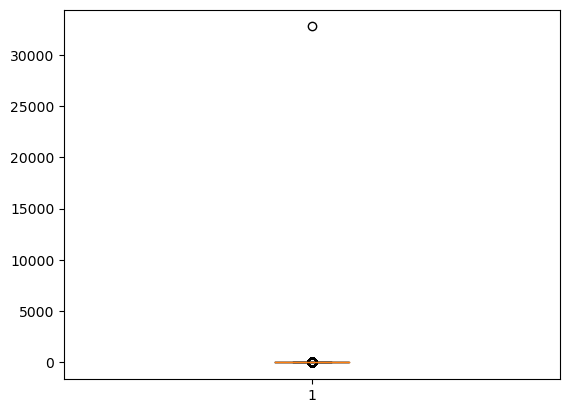

In [51]:
# display box plot for LIMIT_BAL.
plt.boxplot(df['LIMIT_BAL'])

{'whiskers': [<matplotlib.lines.Line2D at 0x24cb29768e0>,
 'caps': [<matplotlib.lines.Line2D at 0x24cb2976e80>,
 'boxes': [<matplotlib.lines.Line2D at 0x24cb2976730>],
 'medians': [<matplotlib.lines.Line2D at 0x24cb2978460>],
 'fliers': [<matplotlib.lines.Line2D at 0x24cb2978730>],
 'means': []}

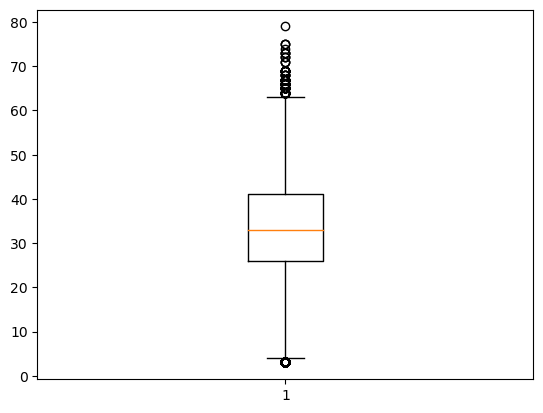

In [52]:
# display box plot for age.
plt.boxplot(df['AGE'])

In [86]:
# perform encoding on default status.
from sklearn.preprocessing import LabelEncoder
laber_enc = LabelEncoder()
df['Default Status'] = laber_enc.fit_transform(df['Default Status'])
df

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default Status
0,1,2.0,24,3913.0,312.0,689.0,30709.50416,29015.123424,28526.276559,2613.957537,689.000000,2584.508988,2250.186122,2300.375885,2608.76576,0
1,2,12.0,26,2682.0,1725.0,2682.0,3272.00000,3455.000000,3261.000000,2613.957537,1.000000,1.000000,1.000000,2300.375885,2.00000,0
2,3,9.0,34,29239.0,1427.0,13559.0,14331.00000,14948.000000,15549.000000,1518.000000,15.000000,1.000000,1.000000,1.000000,5.00000,1
3,4,5.0,37,4699.0,48233.0,49291.0,28314.00000,28959.000000,29547.000000,2.000000,219.000000,12.000000,11.000000,169.000000,1.00000,1
4,5,5.0,57,8617.0,567.0,35835.0,294.00000,19146.000000,19131.000000,2.000000,36681.000000,1.000000,9.000000,689.000000,679.00000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,22.0,39,188948.0,192815.0,28365.0,884.00000,31237.000000,1598.000000,85.000000,2.000000,53.000000,347.000000,5.000000,1.00000,1
29996,29997,15.0,43,1683.0,1828.0,352.0,8979.00000,519.000000,28526.276559,1837.000000,3526.000000,8998.000000,129.000000,2300.375885,2608.76576,1
29997,29998,3.0,37,3565.0,3356.0,2758.0,2878.00000,2582.000000,19357.000000,2613.957537,2922.761583,22.000000,42.000000,2.000000,31.00000,0
29998,29999,8.0,41,-1645.0,78379.0,7634.0,52774.00000,11855.000000,48944.000000,859.000000,349.000000,1178.000000,1926.000000,52964.000000,184.00000,0


# Part-2: Working with Models

In [90]:
#  Create a features and target dataset.
x = df.drop('Default Status', axis=1)
y = df['Default Status']
x

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,2.0,24,3913.0,312.0,689.0,30709.50416,29015.123424,28526.276559,2613.957537,689.000000,2584.508988,2250.186122,2300.375885,2608.76576
1,2,12.0,26,2682.0,1725.0,2682.0,3272.00000,3455.000000,3261.000000,2613.957537,1.000000,1.000000,1.000000,2300.375885,2.00000
2,3,9.0,34,29239.0,1427.0,13559.0,14331.00000,14948.000000,15549.000000,1518.000000,15.000000,1.000000,1.000000,1.000000,5.00000
3,4,5.0,37,4699.0,48233.0,49291.0,28314.00000,28959.000000,29547.000000,2.000000,219.000000,12.000000,11.000000,169.000000,1.00000
4,5,5.0,57,8617.0,567.0,35835.0,294.00000,19146.000000,19131.000000,2.000000,36681.000000,1.000000,9.000000,689.000000,679.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,22.0,39,188948.0,192815.0,28365.0,884.00000,31237.000000,1598.000000,85.000000,2.000000,53.000000,347.000000,5.000000,1.00000
29996,29997,15.0,43,1683.0,1828.0,352.0,8979.00000,519.000000,28526.276559,1837.000000,3526.000000,8998.000000,129.000000,2300.375885,2608.76576
29997,29998,3.0,37,3565.0,3356.0,2758.0,2878.00000,2582.000000,19357.000000,2613.957537,2922.761583,22.000000,42.000000,2.000000,31.00000
29998,29999,8.0,41,-1645.0,78379.0,7634.0,52774.00000,11855.000000,48944.000000,859.000000,349.000000,1178.000000,1926.000000,52964.000000,184.00000


In [60]:
#  Split data into training and testing.
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [62]:
#  Fit the Gaussian naive bayes classifier.
from sklearn.naive_bayes import GaussianNB
regmodel = GaussianNB()
regmodel.fit(x,y)

GaussianNB()

In [63]:
#  Print the training score.
regmodel.score(X_train,y_train)

0.7582916666666667

In [64]:
#  Print the testing score.
regmodel.score(X_test,y_test)

0.7533333333333333

In [65]:
y_pred = regmodel.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [72]:
# Find the accuracy score.
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,classification_report,f1_score
accuracy_score(y_test, y_pred)

0.7533333333333333

In [68]:
#  Find the precision score.
precision_score(y_pred,y_test)

0.9656209712075634

In [69]:
#  Find the recall score.
recall_score(y_pred,y_test)

0.7729618163054696

In [73]:
f1_score(y_pred,y_test)

0.8586167367214367

In [91]:
# Find the Confusion matrix.
confusion_matrix(y_test,y_pred)

array([[  26, 1320],
       [ 160, 4494]], dtype=int64)

In [75]:
#  Find the Classification report.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.14      0.02      0.03      1346
           1       0.77      0.97      0.86      4654

    accuracy                           0.75      6000
   macro avg       0.46      0.49      0.45      6000
weighted avg       0.63      0.75      0.67      6000



In [76]:
y_prob = regmodel.predict_proba(X_test)
y_prob

array([[0.15989776, 0.84010224],
       [0.229039  , 0.770961  ],
       [0.22251188, 0.77748812],
       ...,
       [0.00284261, 0.99715739],
       [0.26552093, 0.73447907],
       [0.20967226, 0.79032774]])

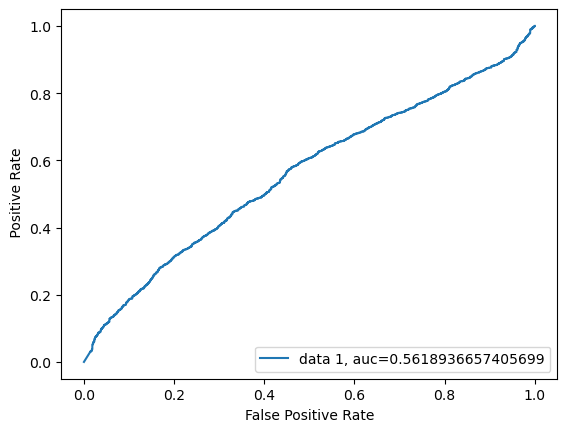

In [78]:
# To represent ROC Graph.
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline

y_pred_proba = regmodel.predict_proba(X_test)[::,1]
fpr, tpr, threshold = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc=" +str(auc))
plt.legend(loc=4)
plt.xlabel("False Positive Rate")
plt.ylabel(" Positive Rate")

plt.show()